In [37]:
from funcs import *
from tqdm import tqdm
import matplotlib

In [2]:
world_pop = gpd.read_file('./data/pop.geo.json')
world_pop['POP2005']=world_pop['POP2005'].astype(float)
world_pop['area']=  world_pop.to_crs(6933).area.astype(float)*0.000001
world_pop['density'] = (world_pop['POP2005'].div(world_pop['area']))

In [3]:
polygons_ = get_polygons(world_pop['geometry'])
source_polygons = get_source_polygons(world_pop['geometry'])
N_vec_ = world_pop['POP2005'].values
Names_ = world_pop['NAME'].values
Areas_ = world_pop['area'].values

In [4]:
hx = 0.1
hy= 0.1

In [5]:
bounds_ = bounds_by_polygons(polygons_)
xgrid,ygrid = make_grids(hx,hy,bounds_)

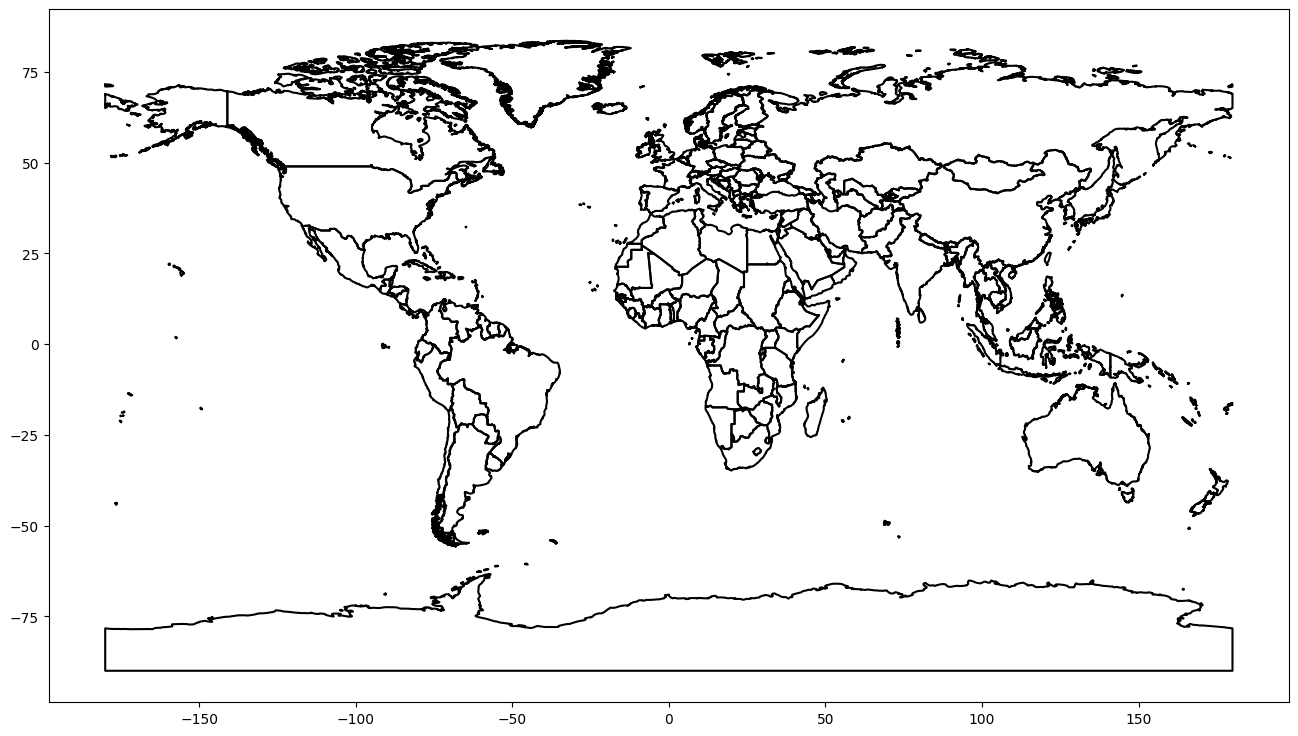

In [6]:
fig,ax = plt.subplots()
fig.set_size_inches(16,9)
for i in range(len(polygons_ )):
    ax.plot(polygons_[i][0],polygons_[i][1],c='k')
# for i in range(len(xgrid)):
#     x_ = xgrid[i]
#     ax.plot([x_,x_],[bounds_[1][0],bounds_[1][1]],c='k',linewidth=0.1)
# for i in range(len(ygrid)):
#     y_ = ygrid[i]
#     ax.plot([bounds_[0][0],bounds_[0][1]],[y_,y_],c='k',linewidth=0.1)
# plt.show()

In [17]:
masks_per_state = get_binary_mask_per_state_cv2(source_polygons,
                                xgrid, ygrid)
mask_of_earth = CUPmasks(masks_per_state)
mask_of_water = np.logical_not(mask_of_earth)

100%|██████████| 211/211 [00:06<00:00, 31.01it/s]


In [18]:
masks_with_N = [masks_per_state[i].astype(np.float32)*N_vec_[i] for i in range(len(masks_per_state))]

In [33]:
mask_of_earth_N = None 
for i in range(len(masks_with_N)):
    if mask_of_earth_N is None:
        mask_of_earth_N = masks_with_N[i]
    else:
        mask_of_earth_N += masks_with_N[i]

In [34]:
mask_of_earth_N.shape

(3601, 1737)

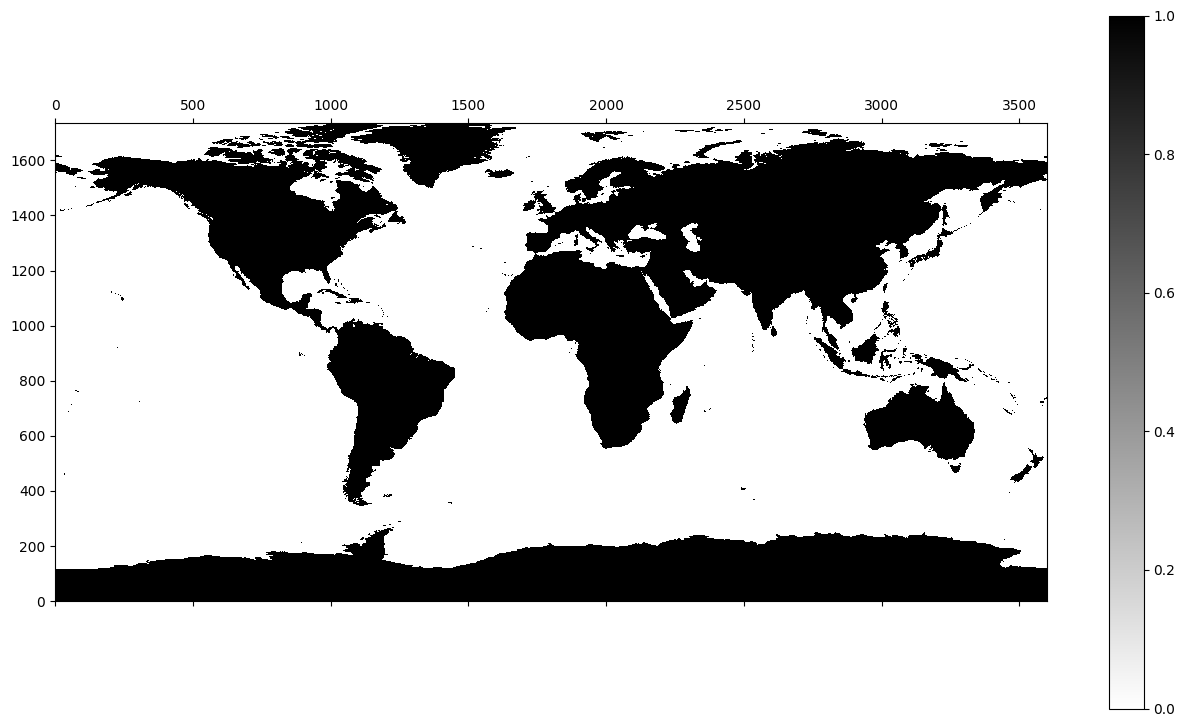

In [41]:
fig,ax = plt.subplots()
fig.set_size_inches(16,9)
cax = ax.matshow(np.asarray(mask_of_earth).T,cmap='binary')
ax.invert_yaxis()
fig.colorbar(cax)

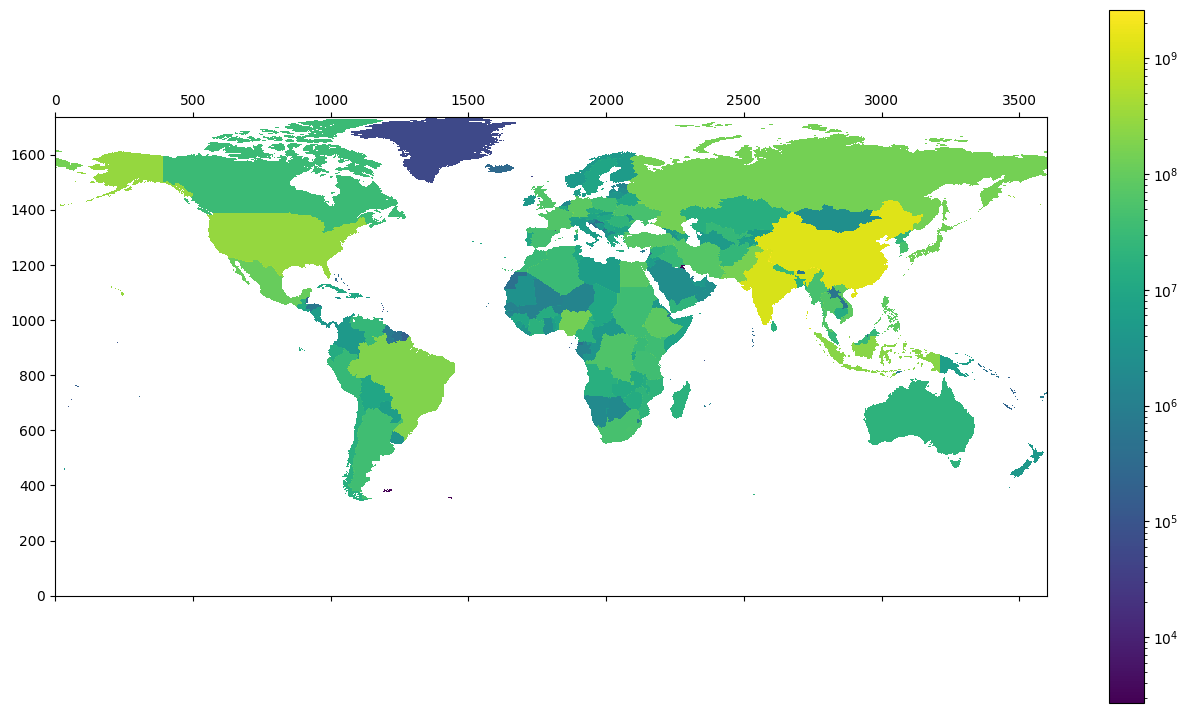

In [47]:
fig,ax = plt.subplots()
fig.set_size_inches(16,9)
cax = ax.matshow(np.asarray(mask_of_earth_N).T,cmap='viridis', norm=matplotlib.colors.LogNorm())
ax.invert_yaxis()
fig.colorbar(cax)